Table of contents
- Import data and libraries
- Addressing PII
- Giving states a region
- Activity exclusion flag
- Income stats/graph
- Creating customer profiles
- Customer profiles graph
- Statistics of days since prior order per profile
- Crosstabs of department ID and Region per profile
- Graphs

# 01. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy

In [2]:
path = r'C:\Users\byl19\Downloads\02-2023 Instacart Basket Analysis'

In [3]:
merged = pd.read_pickle(r'C:\Users\byl19\Downloads\02-2023 Instacart Basket Analysis\02 Data\Prepared Data\merged.pkl')

MemoryError: 

In [32]:
df_departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

# 02. Questions

## 2. 

In this new merged data set, there is a lot of data that contains PII or personally identifiable information. Some columns within the data that include this are first_name, last_name, gender, state, age, n_dependants (number of dependants), fam_status (family status), and income. Each of these columns could be used to trace back to a individual person and therefore should be used and presented carefully. 

## 3.

In [4]:
#Giving each state a region
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']    

In [5]:
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [6]:
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [7]:
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [8]:
#Region column
merged.loc[merged['state'].isin(Northeast), 'region'] = 'Northeast'

In [9]:
merged.loc[merged['state'].isin(Midwest), 'region'] = 'Midwest'

In [10]:
merged.loc[merged['state'].isin(South), 'region'] = 'South'

In [11]:
merged.loc[merged['state'].isin(West), 'region'] = 'West'

In [12]:
#checking
merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

#all these added up = 32,404,859 which is the right number of rows

In [13]:
#crossing variables
crosstab = pd.crosstab(merged['region'], merged['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## 4. 

In [15]:
#creating exclusion flag
merged.loc[merged['max_order'] < 5, 'activity'] = 'low-activity'

In [16]:
merged.loc[merged['max_order'] >= 5, 'activity'] = 'high-activity'

In [17]:
merged['activity'].value_counts(dropna = False)

high-activity    30964564
low-activity      1440295
Name: activity, dtype: int64

In [18]:
#new dataframe with only highly active customers
merged2 = merged.loc[merged['activity'] == 'high-activity']

In [20]:
#exporting new df
merged2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged.pkl'))

## 5. 

In [21]:
#checking income stats
merged2['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [24]:
#income quartiles
income_quartiles = list(merged2['income'].quantile([0.25,0.5,0.75]))

In [25]:
income_quartiles

[67292.0, 96765.0, 128102.0]

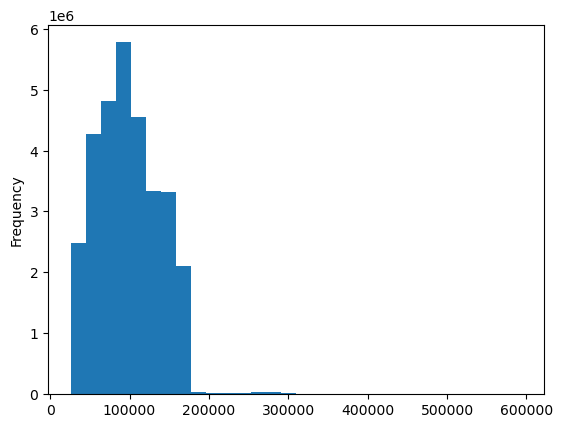

In [29]:
#creating graph for incomes
hist = merged2['income'].plot.hist(bins=30)

In [30]:
#saving graph
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_histogram.png'))

In [33]:
#looking at departments
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [46]:
df_departments.drop(columns = ['Unnamed: 0'])

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


#list of customer profiles
high income familes, average income families, low income families, young parent, old parent, have pets, drink alcohol, eat meat, single adult no kids, married no kids, retired


In [35]:
merged2['fam_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [41]:
#high income families 
merged2.loc[(merged2['income'] > 128102) & (merged2['n_dependants'] > 1), 'profile'] = 'high-income family'

In [42]:
#average income families
merged2.loc[(merged2['income'] < 128102) & (merged2['income'] > 67292) & (merged2['n_dependants'] > 1), 'profile'] = 'average-income family'

In [43]:
#low income families
merged2.loc[(merged2['income'] < 67292) & (merged2['n_dependants'] > 1), 'profile'] = 'high-income family'

In [44]:
#young parent
merged2.loc[(merged2['department_id'] == 18) & (merged2['age'] <= 35) & (merged2['n_dependants'] > 0), 'profile'] = 'young parent'

In [45]:
#old parent
merged2.loc[(merged2['department_id'] == 18) & (merged2['age'] > 35) & (merged2['n_dependants'] > 0), 'profile'] = 'old parent'

In [48]:
#have pets
merged2.loc[merged2['department_id'] == 7, 'profile'] = 'pet_owners'

In [49]:
#drink alcohol
merged2.loc[merged2['department_id'] == 4, 'profile'] = 'alcohol_drinkers'

In [50]:
#eat meat
merged2.loc[merged2['department_id'] == 11, 'profile'] = 'meat_eaters'

In [51]:
#single adult no kids
merged2.loc[(merged2['fam_status'] == 'single') & (merged2['n_dependants'] == 0), 'profile'] = 'single_no_kids'

In [52]:
#married no kids
merged2.loc[(merged2['fam_status'] == 'married') & (merged2['n_dependants'] == 0), 'profile'] = 'married_no_kids'

In [53]:
#retired
merged2.loc[merged2['age'] >= 65, 'profile'] = 'retired'

In [57]:
#everything else
merged2['profile'] = merged2['profile'].fillna('other')

C:\Users\byl19\AppData\Local\Temp\ipykernel_3596\2544013354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged2['profile'] = merged2['profile'].fillna('other')


In [56]:
merged2['profile'].value_counts(dropna = False)

retired                  8195544
alcohol_drinkers         5172822
average-income family    5105751
single_no_kids           5094410
high-income family       5081567
pet_owners               1463419
other                     380937
meat_eaters               243362
old parent                142575
young parent               84177
Name: profile, dtype: int64

## 6.

Text(0.5, 0, 'Customer profile')

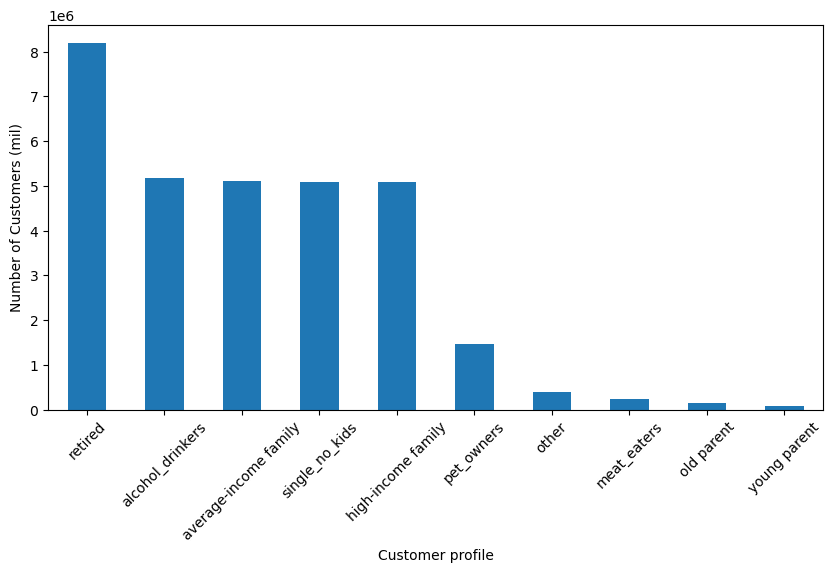

In [68]:
#visualization for customer profiles
bar = merged2['profile'].value_counts().plot.bar(rot = 45, figsize = (10,5))
plt.ylabel ('Number of Customers (mil)')
plt.xlabel ('Customer profile')

In [69]:
#save bar graph
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_profiles_barchart.png'))

## 7.

In [71]:
#fixing prices
merged2.loc[merged2['prices'] > 100, 'prices'] = np.nan

In [72]:
#comparing variables
merged2.groupby('profile').agg({'prices':['max','min','mean'], 'days_since_prior_order':['max','min','mean']})

prices                days_since_prior_order       \
                         max  min      mean                    max  min   
profile                                                                   
alcohol_drinkers        15.0  1.0  7.979148                   30.0 -1.0   
average-income family   25.0  1.0  7.906604                   30.0 -1.0   
high-income family      25.0  1.0  7.512758                   30.0 -1.0   
meat_eaters             15.0  1.0  7.987968                   30.0 -1.0   
old parent              15.0  1.0  7.638846                   30.0 -1.0   
other                   25.0  1.0  7.734189                   30.0 -1.0   
pet_owners              15.0  1.0  7.678006                   30.0 -1.0   
retired                 25.0  1.0  7.796715                   30.0 -1.0   
single_no_kids          25.0  1.0  7.783597                   30.0 -1.0   
young parent            15.0  1.0  7.657430                   30.0 -1.0   

                                  
                            mean  
profile                           
alcohol_drinkers        9.987518  
average-income family  10.234975  
high-income family     10.364329  
meat_eaters            10.547896  
old parent              9.126712  
other                  10.194140  
pet_owners             10.176103  
retired                10.157298  
single_no_kids         10.179026  
young parent            9.312758

## 8. 

In [73]:
#customer profiles vs regions
crosstab3 = pd.crosstab(merged2['profile'], merged2['region'], dropna = False)

In [74]:
crosstab3

region,Midwest,Northeast,South,West
profile,,,,
alcohol_drinkers,1212481,908295,1734393,1317653
average-income family,1181585,899933,1711867,1312366
high-income family,1212789,889533,1669488,1309757
meat_eaters,57808,43000,81845,60709
old parent,33227,25116,47939,36293
other,92575,60441,134661,93260
pet_owners,341238,262487,489251,370443
retired,1904046,1484807,2708461,2098230
single_no_kids,1205618,875715,1704619,1308458


In [75]:
#customer profiles vs department id
crosstab4 = pd.crosstab(merged2['profile'], merged2['department_id'], dropna = False)

In [76]:
crosstab4

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
alcohol_drinkers,0,0,0,5172822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
average-income family,594017,9669,312730,0,38415,73452,0,25971,238215,9283,...,202135,505502,179644,291183,1467876,191297,0,669299,278763,18300
high-income family,575208,9237,303123,0,41831,67391,0,25138,215604,9317,...,169944,476642,191953,267102,1385630,195585,0,858405,271856,17601
meat_eaters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
old parent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,142575,0,0,0
other,42865,687,23318,0,2720,5302,0,1259,16956,582,...,13295,36165,14115,19528,103830,13433,8459,55959,21383,1081
pet_owners,0,0,0,0,0,0,1463419,0,0,0,...,0,0,0,0,0,0,0,0,0,0
retired,564250,8946,295997,2408104,36693,67199,684020,25115,217316,8945,...,181150,472383,175296,267509,1368072,186630,106204,728549,265199,16915
single_no_kids,345391,5872,185660,1498347,24968,42647,424462,15577,134045,5324,...,108257,292013,109842,166752,851774,112912,68977,454194,166633,10871


#from just looking at these crosstabs its hard to tell specifically if there are links between regions and customer profiles. Making visualizations of this will help determine if anything stands out. It also is counting total numbers of each customer profile in each region which is not a good comparison because one region could have more customers than another and we should be looking at the % of customer profile within each region to compare them. 

## 9.

Text(0.5, 1.0, 'Instacart orders by profile and region')

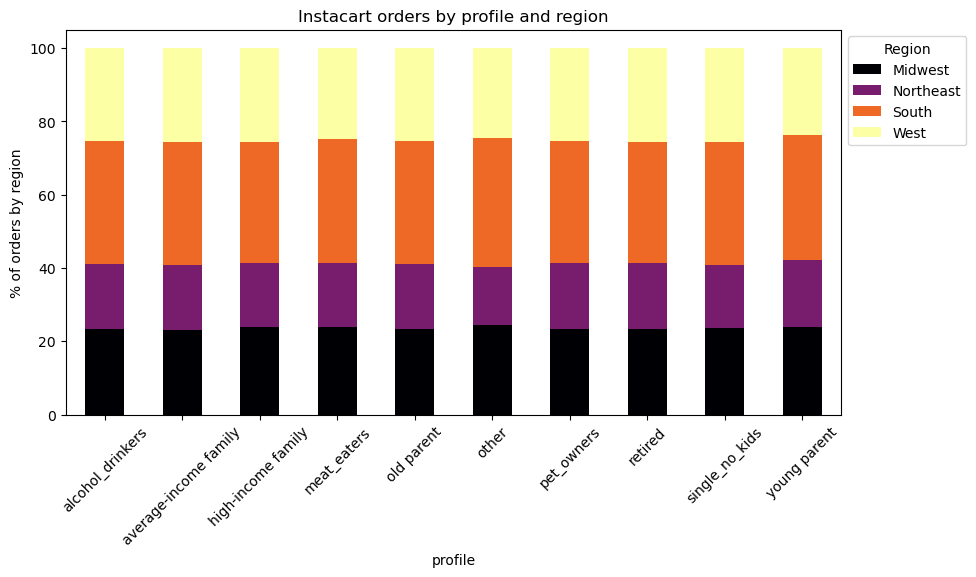

In [85]:
#profile region bar chart
bar_profile_region = crosstab3.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(10,5), colormap='inferno').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region")

In [86]:
#saving bar chart
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','profile_region_bar.png'))

Text(0.5, 1.0, 'Instacart orders by profile and department')

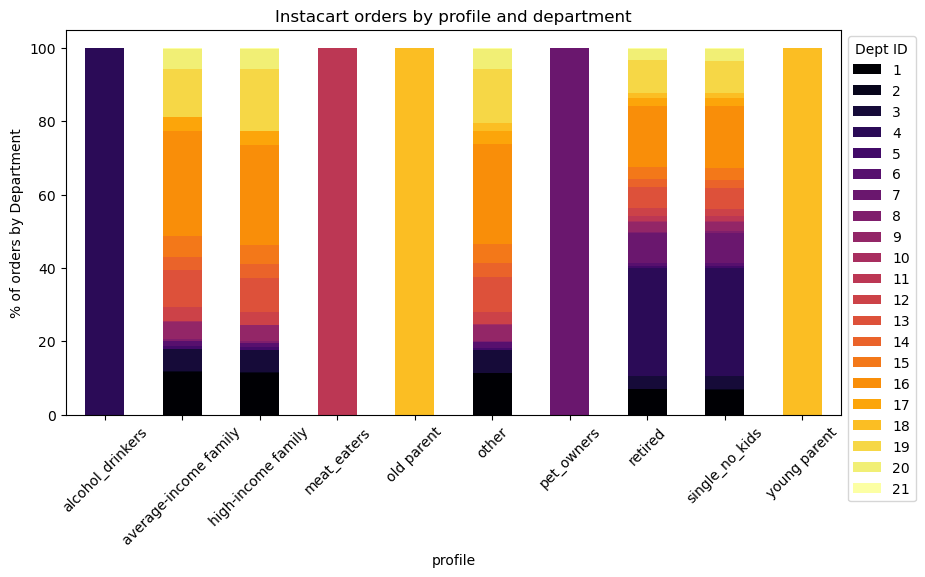

In [92]:
#profile department bar chart
bar_profile_department = crosstab4.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(10,5), colormap='inferno').legend(title="Dept ID", bbox_to_anchor=(1.0,1.0))
plt.ylabel("% of orders by Department")
plt.title ("Instacart orders by profile and department")

In [93]:
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','profile_department_bar.png'))

In [94]:
#export data
merged2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged.pkl'))

In [95]:
df_departments.to_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))